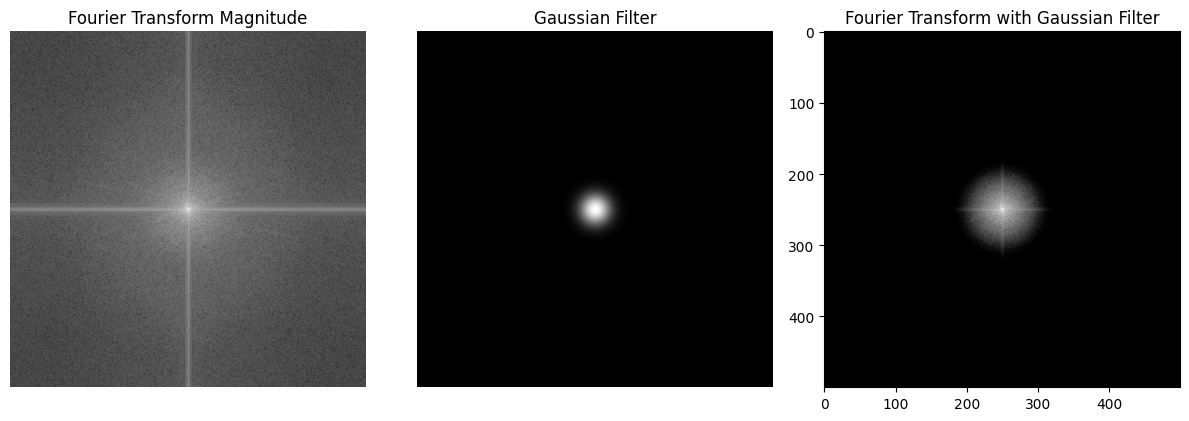

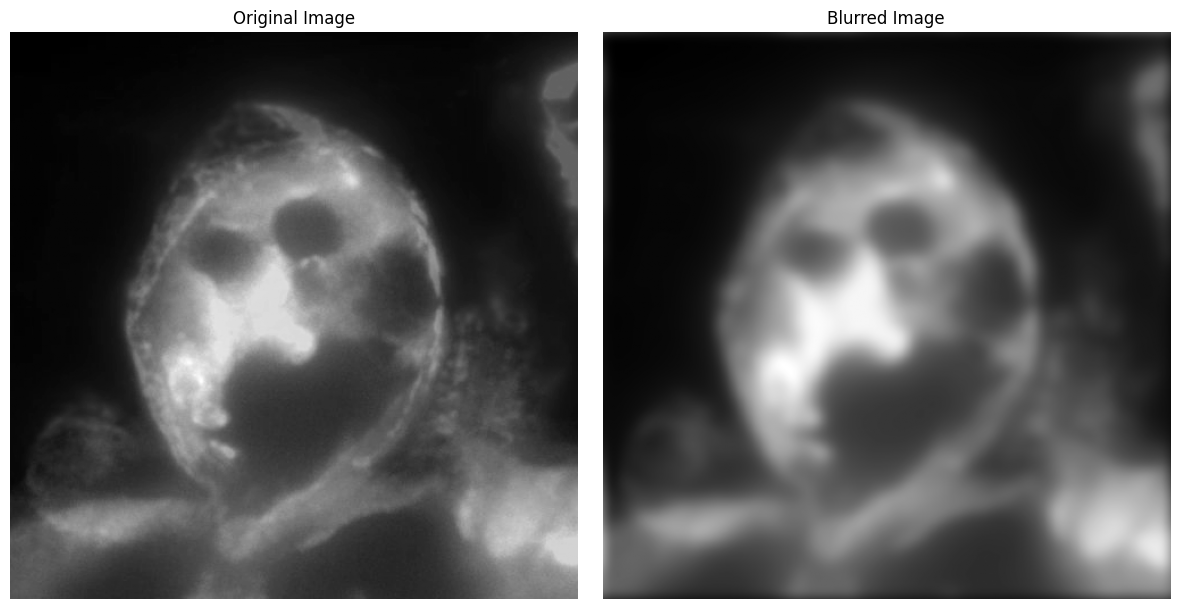

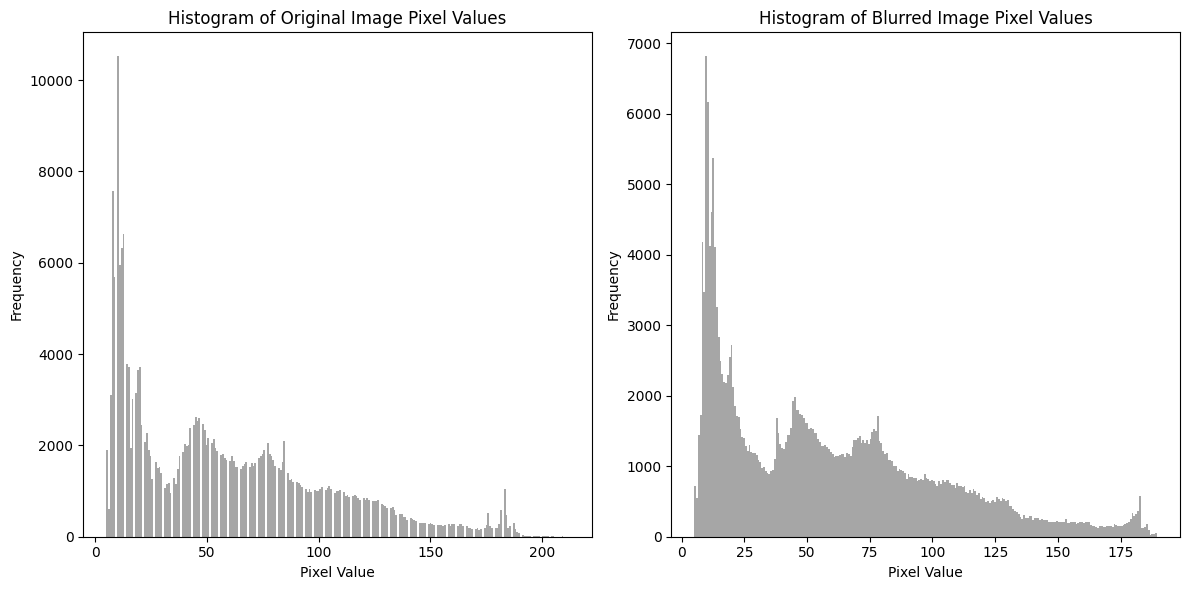

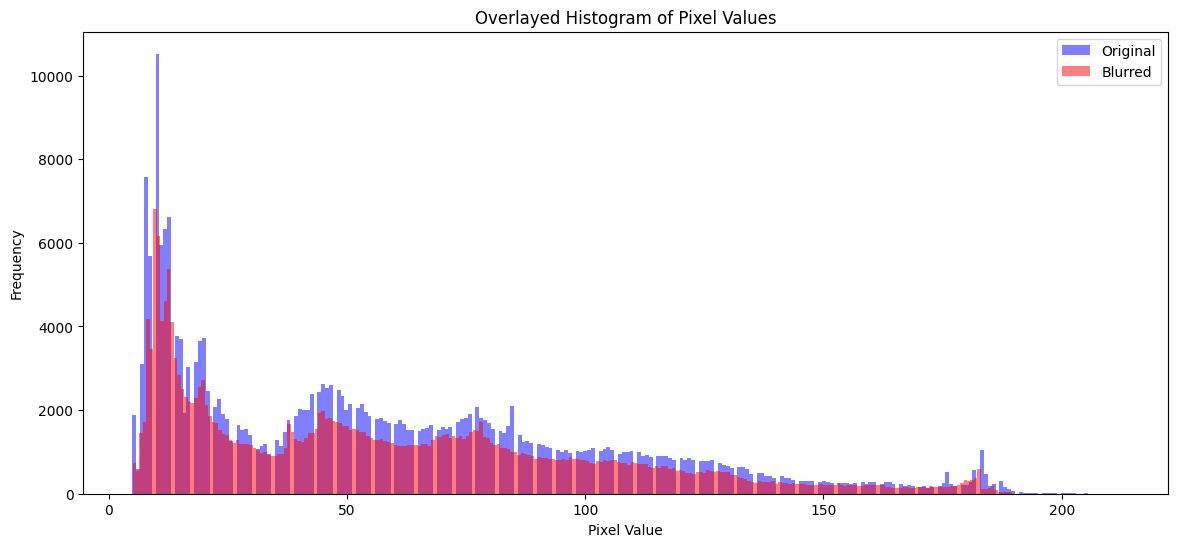

Kolmogorov-Smirnov test statistic: 0.048799999999999996, p-value: 3.879542533308244e-259
The two distributions are significantly different (reject null hypothesis).
Image processing completed successfully.


In [4]:
#This code will take an image titled "Test_Image.png" and create a blurred version using a fuorier transform. The original and blurred images will be plotted on a histogram. The blurred image will be saved as "Blurred_Image.png".
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import PIL.Image as PIL

# Load the image
def open_image():
    # Read the image in grayscale mode
    image = PIL.open('Test_Image.png').convert('L')
    # Convert the image to a numpy array
    image = np.array(image)
    return image

# Apply Fourier Transform and create a blurred image
def blur_image(image):
    # Apply Fourier Transform
    f_transform = np.fft.fft2(image) # Compute the 2D Fourier Transform
    f_transform_shifted = np.fft.fftshift(f_transform) # Shift the zero frequency component to the center

    # Create a Gaussian filter
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    x = np.linspace(-ccol, ccol - 1, cols)
    y = np.linspace(-crow, crow - 1, rows)
    X, Y = np.meshgrid(x, y)
    sigma = 15 # Standard deviation for the Gaussian filter
    gaussian_filter = np.exp(-(X**2 + Y**2) / (2 * sigma**2))

    ##Plot the fourier transform and the gaussian filter
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.title('Fourier Transform Magnitude')
    plt.imshow(np.log(np.abs(f_transform_shifted) + 1), cmap='gray') # Log scale for better visibility
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.title('Gaussian Filter')
    plt.imshow(gaussian_filter, cmap='gray')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.title('Fourier Transform with Gaussian Filter')
    plt.imshow(np.log(np.abs(f_transform_shifted * gaussian_filter) + 1), cmap='gray') # Log scale for better visibility
    plt.tight_layout()
    plt.show()

    # Apply the filter to the Fourier Transform
    f_transform_blurred = f_transform_shifted * gaussian_filter

    # Inverse Fourier Transform to get the blurred image
    blurred_image = np.fft.ifft2(np.fft.ifftshift(f_transform_blurred)).real
    return blurred_image

#Resize the blurred image to a 250x250 pixel image
def resize_image(image, size=(250, 250)):
    image_pil = PIL.fromarray(image)
    resized_image = image_pil.resize(size)
    return np.array(resized_image)

# Plot the original and blurred images
def plot_images(original, blurred):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(original, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Blurred Image')
    plt.imshow(blurred, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

#Plot the histogram of pixel values
def plot_histogram(original, blurred):
    plt.figure(figsize=(12, 6))
   
    plt.subplot(1, 2, 1)
    plt.hist(original.ravel(), bins=256, color='gray', alpha=0.7)
    plt.title('Histogram of Original Image Pixel Values')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    plt.title('Histogram of Blurred Image Pixel Values')
    plt.hist(blurred.ravel(), bins=256, color='gray', alpha=0.7)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(14, 6))
    plt.hist(original.ravel(), bins=256, color='blue', alpha=0.5, label='Original')
    plt.hist(blurred.ravel(), bins=256, color='red', alpha=0.5, label='Blurred')
    plt.title('Overlayed Histogram of Pixel Values')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

def measure_statistics_of_histogram(original, blurred):
    ks_2s_test = stats.ks_2samp(original.ravel(), blurred.ravel())
    print(f"Kolmogorov-Smirnov test statistic: {ks_2s_test.statistic}, p-value: {ks_2s_test.pvalue}")
    if ks_2s_test.pvalue < 0.05:
        print("The two distributions are significantly different (reject null hypothesis).")
    else:
        print("The two distributions are not significantly different (fail to reject null hypothesis).")
    return ks_2s_test.statistic, ks_2s_test.pvalue 
    
# Main function to execute the image processing
def main():
    original_image = open_image()
    blurred_image = blur_image(original_image)
    
    #Save the blurred image as a PNG file
    PIL.fromarray(blurred_image).convert('L').save('Blurred_Image.png')  # Save the blurred image as PNG
    #Save the blurred image resized to 250x250 pixels
    resized_blurred_image = resize_image(blurred_image)
    PIL.fromarray(resized_blurred_image).convert('L').save('Blurred_Image_Resized.png')  # Save the resized blurred image as PNG
    # Plot the original and blurred images
    plot_images(original_image, blurred_image)
    plot_histogram(original_image, blurred_image)
    measure_statistics_of_histogram(original_image, blurred_image)
    print("Image processing completed successfully.")
    
main()